# Capstone Project: Credit Card Fraud Detection

## Objective
The primary objective of this project is to develop a machine
learning model that accurately detects fraudulent credit card
transactions using a historical dataset. The model should be
capable of distinguishing between legitimate and fraudulent
transactions in real time, minimizing false positives and
false negatives to protect both customers and financial
institutions.

## dataset
contains transactions made by European
cardholders in September 2013. It includes transactions that
occurred over two days, with 492 frauds out of 284,807
transactions, making the dataset highly unbalanced. The
positive class (frauds) accounts for only 0.172% of all
transactions.

The dataset is as follows:
https://drive.google.com/file/d/1u_9Zr5cEZYSCn-YhG4Ym
rct6oHcNKTNC/view?usp=sharing

In [1]:
import os

In [2]:
os.listdir('../')

['app.py',
 'README.md',
 'notebooks',
 'test.py',
 '.venv',
 'y_small.csv',
 'requirements.txt',
 'dummy.py',
 'creditcard.csv',
 'y.csv',
 'x_small.csv',
 'predictions.csv',
 'models',
 'x.csv']

In [3]:
!which python

/home/t/atest/credit card fraud detection capstone project/.venv/bin/python


In [4]:
# get the dataset
if not os.path.exists('../creditcard.csv'):
    url = "https://drive.google.com/file/d/1u_9Zr5cEZYSCn-YhG4Ymrct6oHcNKTNC/view?usp=sharing"
    !gdown --id 1u_9Zr5cEZYSCn-YhG4Ymrct6oHcNKTNC


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import random

# Seed numpy and random
np.random.seed(42)
random.seed(42)


In [6]:
# Load the dataset
df = pd.read_csv('../creditcard.csv')

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

In [9]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
X.isnull().sum() # no nulls

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

## Scaling

In [12]:
# Normalize and standardize 'Time' and 'Amount' and all the principal axes features
timescaler = StandardScaler()
scaler = StandardScaler()
amountscaler = StandardScaler()

time_scaled = timescaler.fit_transform(X[['Time']])
amount_scaled = amountscaler.fit_transform(X[['Amount']])
pca_scaled = scaler.fit_transform(X.drop(['Time', 'Amount'], axis=1))

X = pd.DataFrame(np.concatenate((time_scaled, pca_scaled, amount_scaled), axis=1), columns=X.columns)


In [13]:
X.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-1.122574,-8.437520,5.198899,-12.299967,6.713625,-9.993751,-2.126001,-13.500776,6.294084,-7.743333,...,-1.965076,1.621105,-1.553906,-3.776994,1.111972,-2.711992,-0.959638,-5.001031,-3.159221,1.102834
49906,-1.064538,0.173489,-1.661561,-0.088422,-0.978715,-1.051563,0.762524,-0.423881,0.187600,0.818971,...,0.656412,-0.290578,-1.298780,-0.843641,-1.910343,0.597015,-1.548333,0.101567,0.309128,1.726255
29474,-1.249364,0.714553,-0.357718,0.111208,-0.727435,-0.391095,0.030357,-0.576002,0.001925,-0.884508,...,0.276133,0.139407,0.231872,-0.266853,-1.337827,0.968934,-0.481807,0.028265,0.014039,-0.229289
276481,1.522680,-0.220592,0.997935,-1.100978,-0.246848,0.569308,-0.473363,0.223904,0.490664,-0.441200,...,-0.317325,0.488660,1.203890,-0.286074,-0.028351,-0.397853,-0.327142,-0.588125,0.005860,-0.347232
278846,1.551109,1.028319,-0.083203,-0.669967,0.231144,-0.131991,-0.718001,0.034954,-0.134589,0.330631,...,-0.331152,-0.324896,-0.849387,0.555752,0.101645,-0.690987,0.362340,-0.193353,-0.213796,-0.349671
101565,-0.567213,-0.327427,-0.034702,0.982685,-1.192296,-0.833941,0.195153,-1.124468,-1.954263,1.063728,...,0.802169,-1.676781,0.354367,-0.595640,-0.063678,2.680942,-1.380985,0.076810,0.546398,0.046579
260880,1.367694,1.033318,-0.072754,-0.716845,0.298771,-0.103533,-0.846490,0.144285,-0.253890,0.513830,...,-0.273522,-0.375992,-0.961428,0.537475,-0.028393,-0.623284,0.414791,-0.177305,-0.176392,-0.285302
214337,0.943756,-0.351737,0.782504,-0.372155,-1.029423,1.636184,-0.242647,1.357203,-0.087184,-1.169958,...,-0.048189,-0.009366,-0.236416,-1.153029,-0.692542,2.325041,1.391288,-0.257627,0.091141,-0.317447
201575,0.824000,1.082029,0.086380,-1.565265,0.382768,0.440805,-1.332737,0.772598,-0.501848,0.009484,...,-0.419721,0.359777,1.237792,-0.269133,0.097930,1.202717,1.511812,-0.319895,-0.286938,-0.313249
81055,-0.759030,-2.851012,-2.865861,-0.295763,-0.085772,-0.512527,-0.085850,-1.256680,1.173965,-0.028848,...,-1.357981,0.056704,0.856812,0.357856,-1.271596,1.191654,-0.059594,1.251622,-5.751052,0.052536


# Data Imbalance Check

<Axes: xlabel='Class', ylabel='count'>

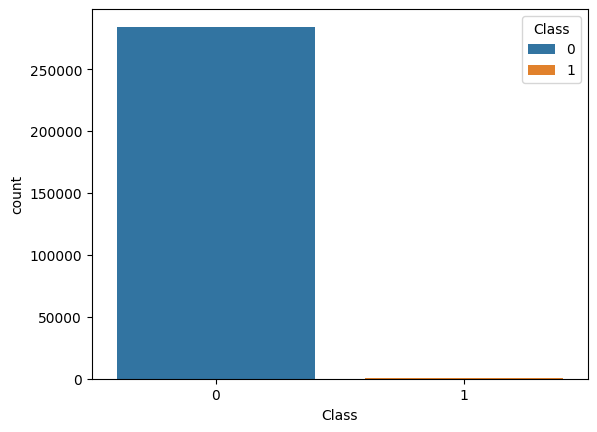

In [14]:
sns.countplot(x=y, hue=y)

In [15]:

print('class counts: ', np.bincount(y))

print(f"Class 0:  {np.bincount(y)[0]:>7}  dataset %: {np.bincount(y)[0]/np.sum(np.bincount(y))*100:.5f}")
print(f"Class 1:  {np.bincount(y)[1]:>7}  dataset %: {np.bincount(y)[1]/np.sum(np.bincount(y))*100:.5f}")

class counts:  [284315    492]
Class 0:   284315  dataset %: 99.82725
Class 1:      492  dataset %: 0.17275


Highly imbalanced data

the class 1 has only 0.172% percent of the data, to mitigate this, we can use SMOTE, which is an oversampling technique

# EDA

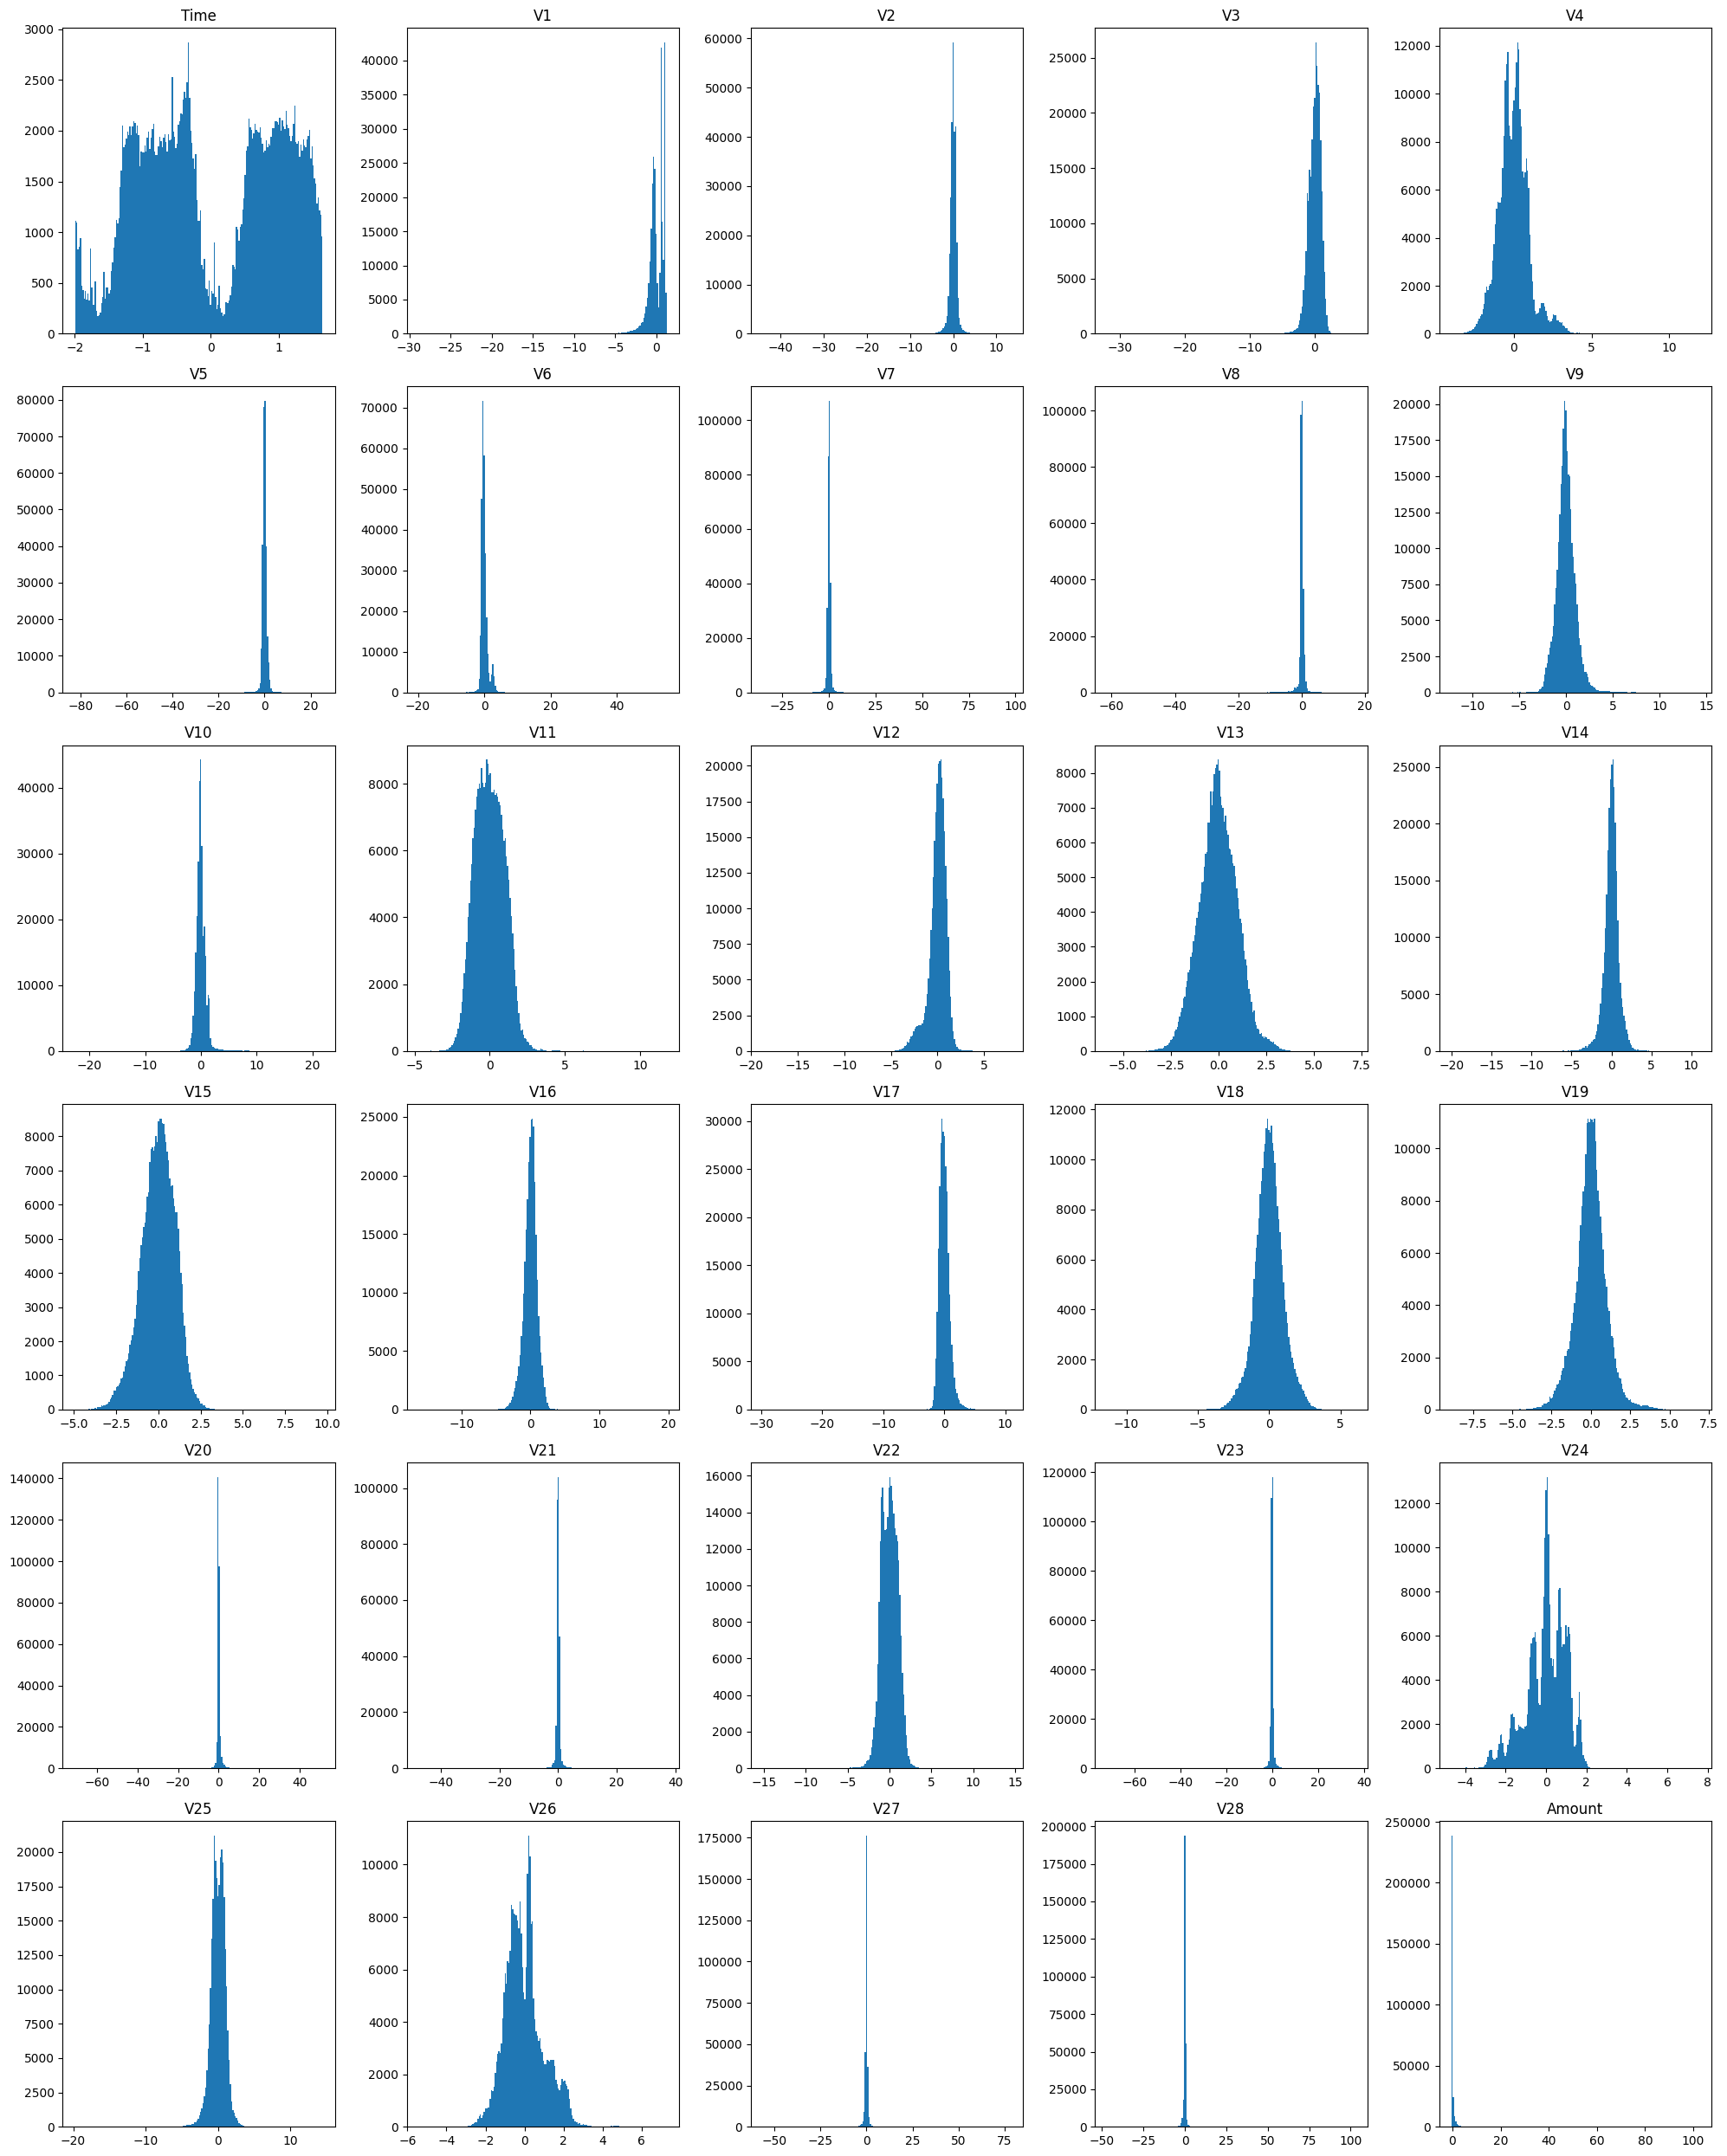

In [16]:
fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(20, 25))
ax = ax.flatten()

# Loop through each feature and plot its distribution
for num, col in enumerate(X.columns):
    ax[num].hist(X[col], bins=200)
    ax[num].set_title(col)

# Adjust layout

plt.tight_layout()

# Show plot
plt.show()

Given the distribution,  features require transformations for better model performance
this will require power transformation to make the distribution more normal

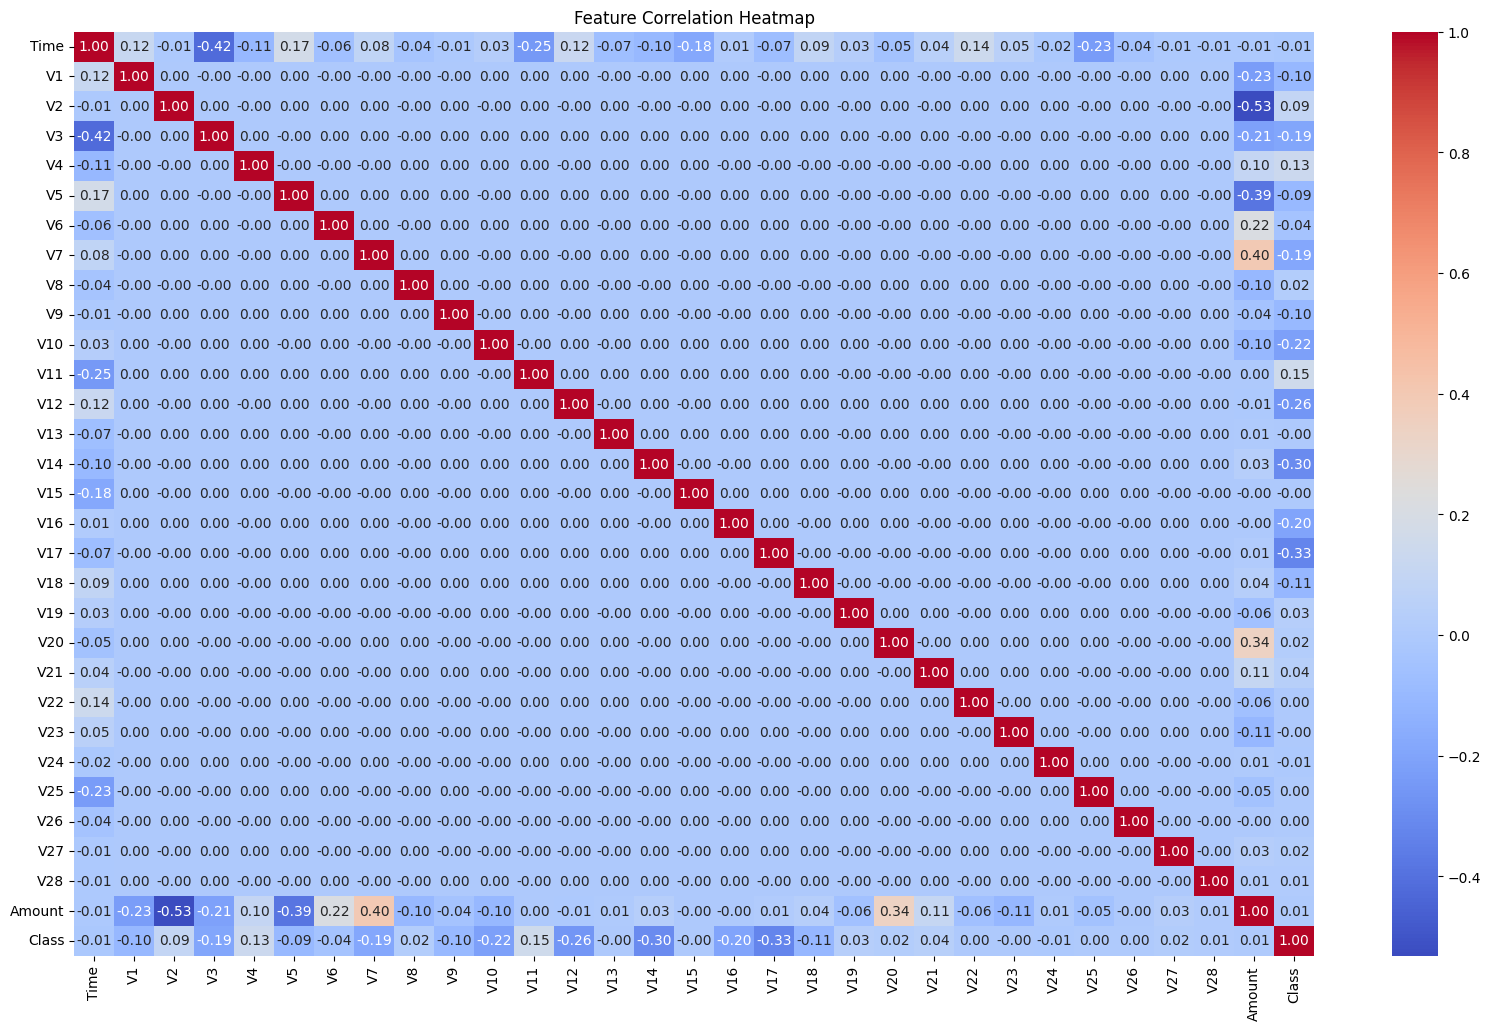

In [17]:
# Correlation heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


we can clearly see that principal axes are  mostly independent of each other (approximate to 2 decimal places)

### Visualize the distribution of fraudulent vs. non-fraudulent transactions

In [18]:
X_numpy, y_numpy = X.to_numpy(), y.to_numpy()

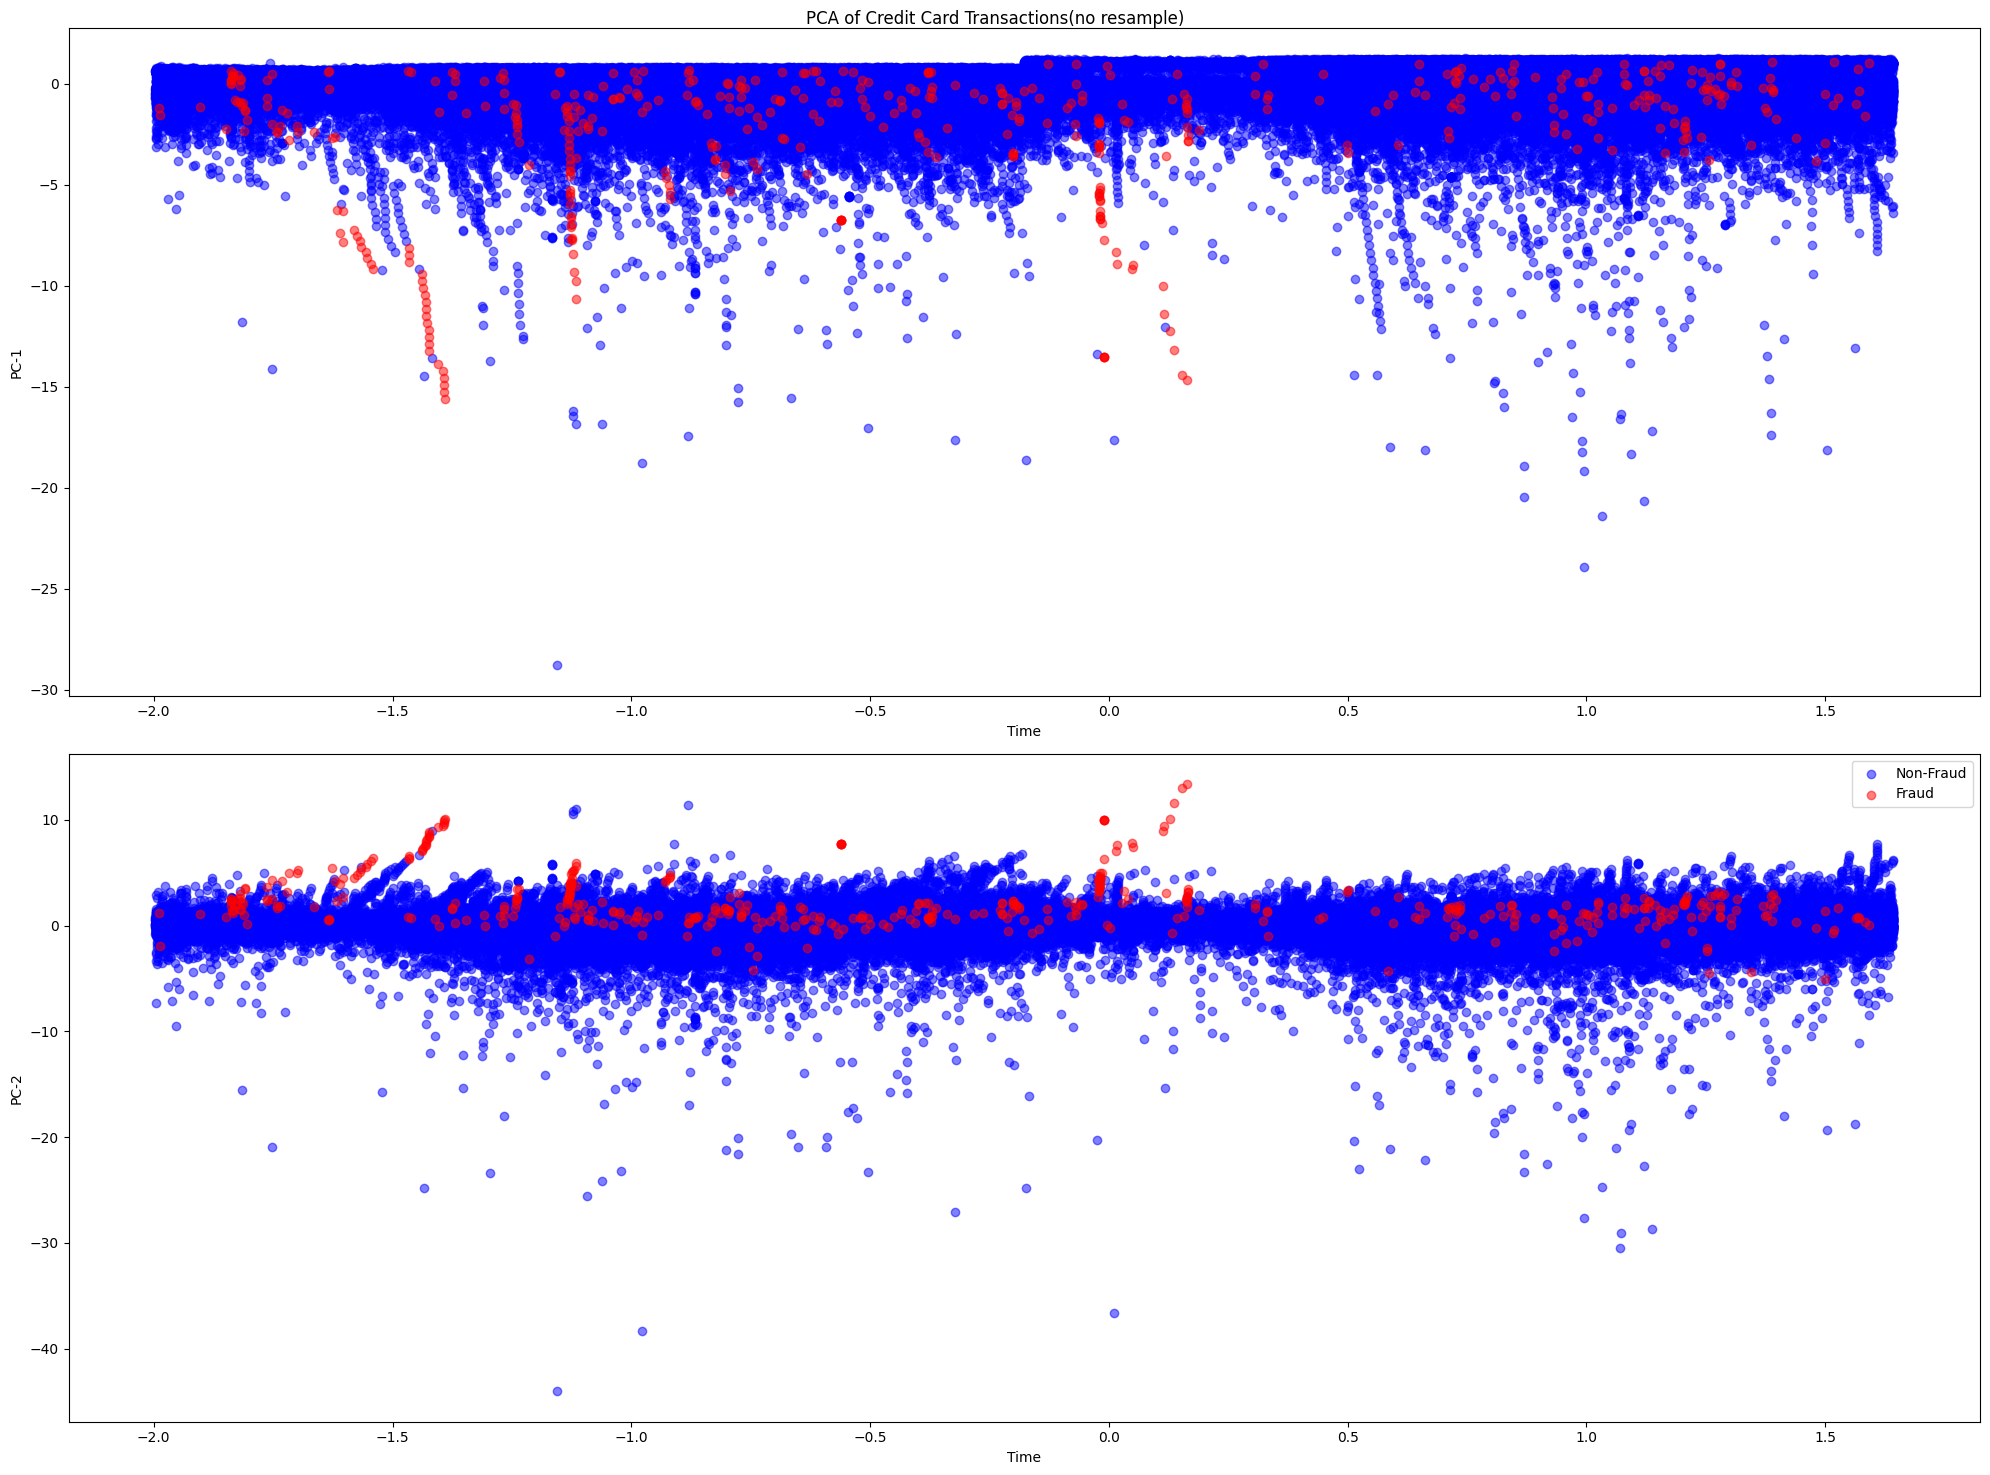

In [19]:


p_axis = 2
# Visualize the distribution of fraudulent vs. non-fraudulent transactions
fig, ax = plt.subplots(nrows=p_axis,ncols=1, sharex=False, figsize=(20, 15))


for i in range(1,p_axis+1):
    ax[i-1].scatter(X_numpy[y_numpy == 0, 0], X_numpy[y_numpy == 0, i], label='Non-Fraud', alpha=0.5, c='b')

    ax[i-1].scatter(X_numpy[y_numpy == 1, 0], X_numpy[y_numpy == 1, i], label='Fraud', alpha=0.5, c='r')
    ax[i-1].set_xlabel('Time')
    ax[i-1].set_ylabel(f'PC-{i}')

plt.suptitle('PCA of Credit Card Transactions(no resample)')
plt.legend()
plt.tight_layout()
plt.show()


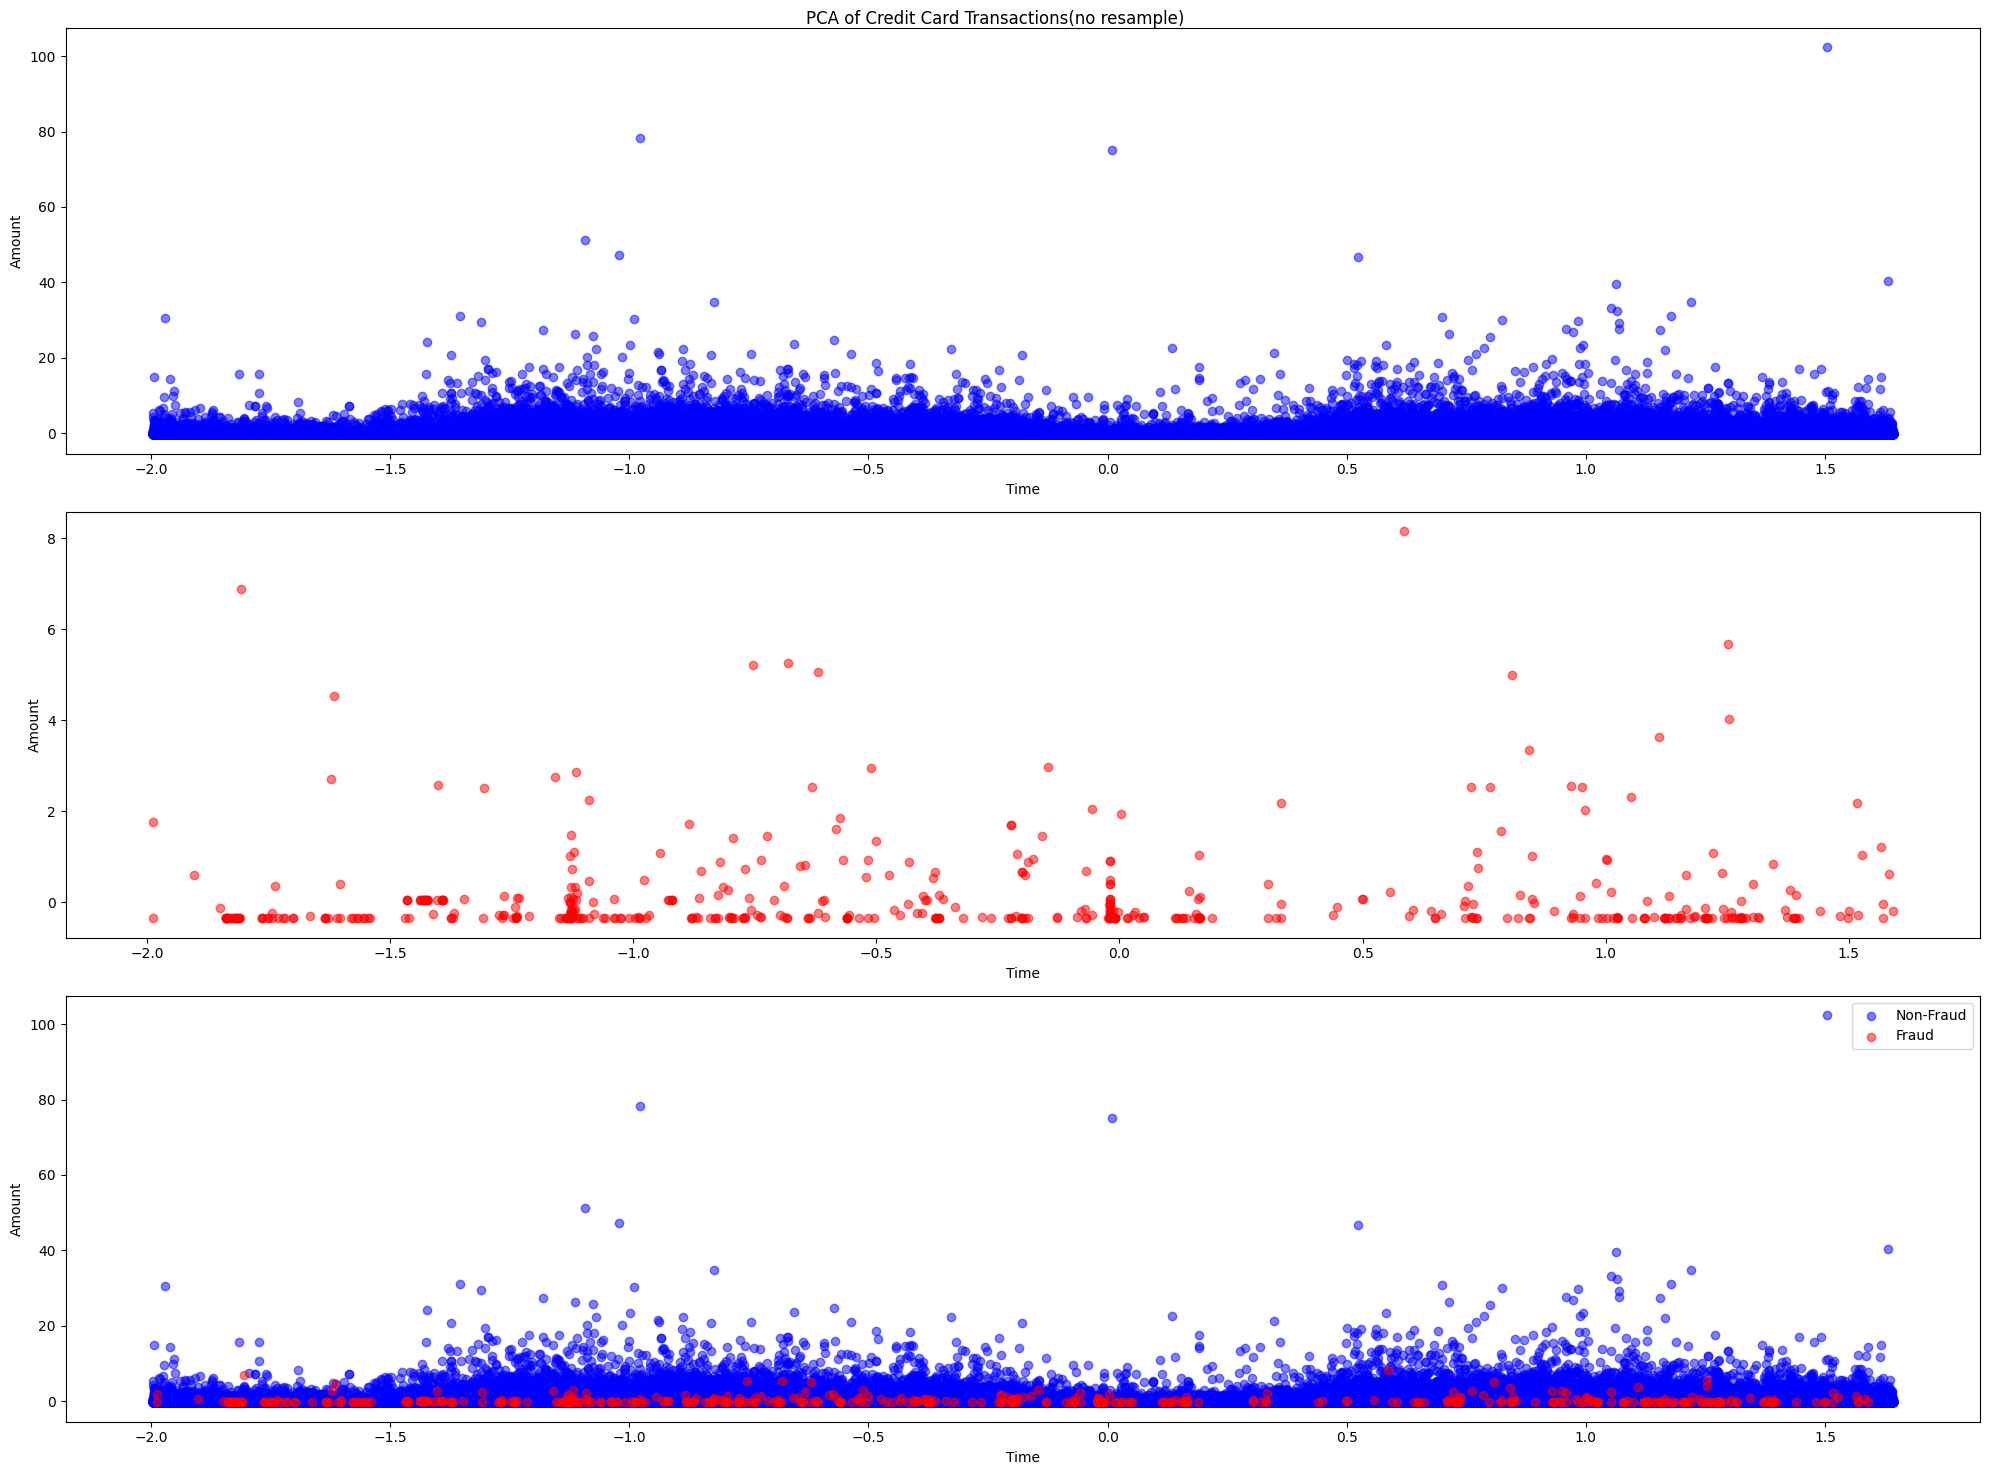

In [20]:
# Visualize the distribution of fraudulent vs. non-fraudulent transactions
fig, ax = plt.subplots(nrows=3,ncols=1, sharex=False, figsize=(20, 15))


ax[0].scatter(X_numpy[y_numpy == 0, 0], X_numpy[y_numpy == 0, -1], label='Non-Fraud', alpha=0.5, c='b')
ax[0].set_xlabel('Time')
ax[0].set_ylabel(f'Amount')

ax[1].scatter(X_numpy[y_numpy == 1, 0], X_numpy[y_numpy == 1, -1], label='Fraud', alpha=0.5, c='r')
ax[1].set_xlabel('Time')
ax[1].set_ylabel(f'Amount')

ax[2].scatter(X_numpy[y_numpy == 0, 0], X_numpy[y_numpy == 0, -1], label='Non-Fraud', alpha=0.5, c='b')
ax[2].scatter(X_numpy[y_numpy == 1, 0], X_numpy[y_numpy == 1, -1], label='Fraud', alpha=0.5, c='r')
ax[2].set_xlabel('Time')
ax[2].set_ylabel(f'Amount')

plt.suptitle('PCA of Credit Card Transactions(no resample)')
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
from functools import partial

first_quantile= partial(np.quantile, q=0.25)
third_quantile= partial(np.quantile, q=0.75)

In [22]:
amt_agg = df.groupby('Class').agg(['mean', 'std','median', 'max', 'min', 'count',first_quantile, third_quantile ])['Amount']
amt_agg

,mean,std,median,max,min,count,quantile,quantile
Class,,,,,,,,
0,88.291022,250.105092,22.00,25691.16,0.0,284315,5.65,77.05
1,122.211321,256.683288,9.25,2125.87,0.0,492,1.00,105.89


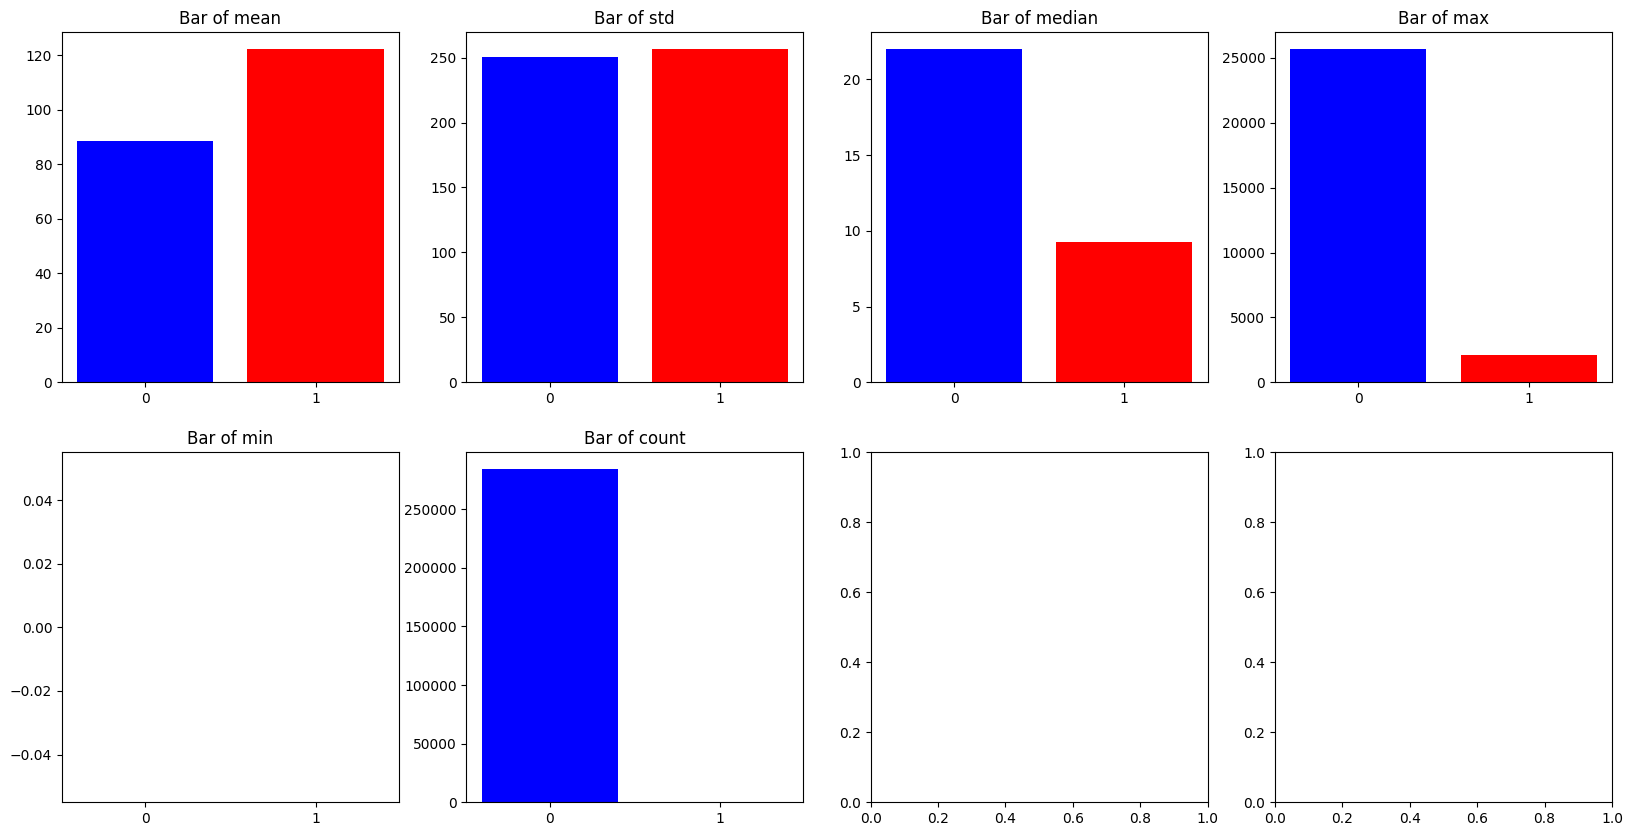

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
ax = ax.flatten()
for num, col in enumerate(amt_agg.columns):
    if col=='quantile':
        break
    ax[num].bar(amt_agg.index, amt_agg[col], color=['blue', 'red'])
    ax[num].set_title(f'Bar of {col}')
    ax[num].set_xticks([0,1])
plt.show()

## Handle class imbalance

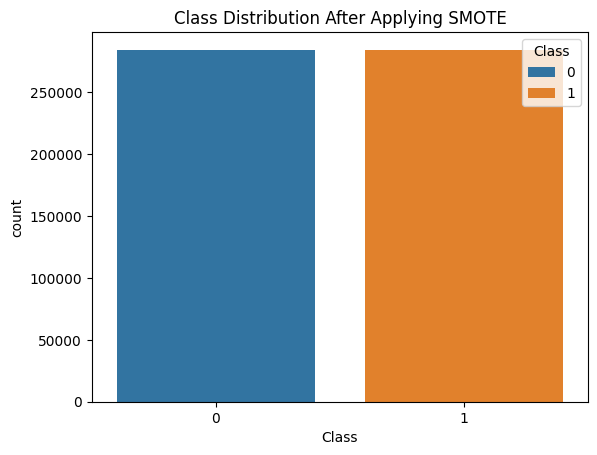

Class counts after SMOTE:  [284315 284315]
Class 0:   284315  Dataset %: 50.00000
Class 1:   284315  Dataset %: 50.00000


In [24]:
# Applying SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify new class distribution
sns.countplot(x=y_resampled, hue=y_resampled)
plt.title('Class Distribution After Applying SMOTE')
plt.show()

print('Class counts after SMOTE: ', np.bincount(y_resampled))
print(f"Class 0:  {np.bincount(y_resampled)[0]:>7}  Dataset %: {np.bincount(y_resampled)[0]/np.sum(np.bincount(y_resampled))*100:.5f}")
print(f"Class 1:  {np.bincount(y_resampled)[1]:>7}  Dataset %: {np.bincount(y_resampled)[1]/np.sum(np.bincount(y_resampled))*100:.5f}")


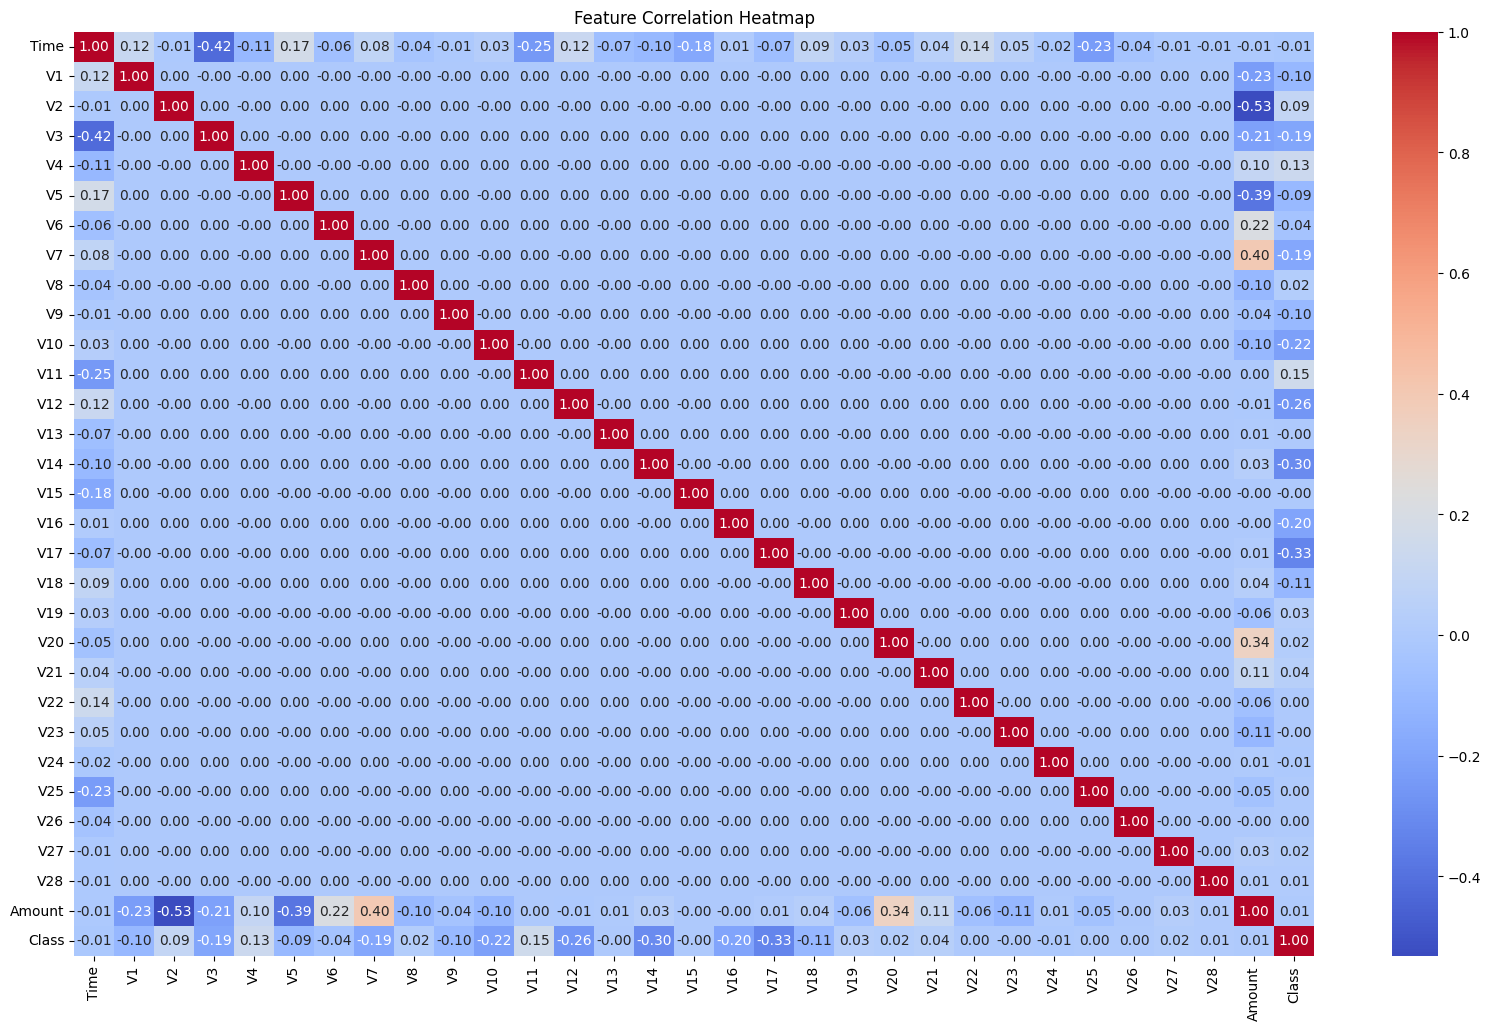

In [25]:
# Identifying correlations between features
correlation_matrix = df.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

## Feature engineering

* since most of values are principal axes, domain specific columns can not be generated, but we will try to create more features using polynominal features and see how it affects the model performance (or not)

* We will drop "time" column as it is not a good approach to introduce a bias if there is trend in time.

In [26]:
x_resampled_no_time = X_resampled.drop('Time', axis=1)

X_resampled.shape, x_resampled_no_time.shape

((568630, 30), (568630, 29))

In [27]:
x_resampled_no_time_poly = x_resampled_no_time.copy()

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from datetime import datetime

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x_resampled_no_time, y_resampled,train_size=0.1, test_size=0.02, random_state=42, stratify=y_resampled)

# demo model (training on 10% data)

our dataset is quite large and logistic and gradient boosting requires good amount of computation that's why we will train on 10% of data, see which model is performing well with grid search.

we will proceed further with best performing model.

In [30]:
# Evaluate various models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Hyperparameter tuning (example for Logistic Regression)
param_grid = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [10, 15, 30], 'max_depth': [10, 20, 30, 40]},
    'Gradient Boosting': {'n_estimators': [10, 15], 'learning_rate': [0.01, 0.1]},
    'Neural Network': {'hidden_layer_sizes': [(10,), (15,)], 'alpha': [0.0001, 0.001], 'warm_start': [True, False]}
}

best_models = {}
for model_name in models:
    # if model_name == 'Logistic Regression':
    #     continue

    print(f"Tuning {model_name}...", datetime.now())
    grid = GridSearchCV(models[model_name], param_grid[model_name], scoring='average_precision', cv=5, n_jobs=-1)
    grid.fit(xtrain, ytrain)
    
    best_models[model_name] = grid.best_estimator_



Tuning Logistic Regression... 2024-06-29 20:26:14.081876 >> Tuning Random Forest... 2024-06-29 20:26:28.510363 >> Tuning Gradient Boosting... 2024-06-29 20:27:30.366279 >> Tuning Neural Network... 2024-06-29 20:28:16.137281 >> 

In [31]:
print(datetime.now())

2024-06-29 20:31:25.332060


In [32]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix, recall_score, precision_score

In [33]:
def get_metrics(ytest, ypred, model_name=None):
    # Calculate metrics
    f1          = f1_score(ytest, ypred)
    roc_auc     = roc_auc_score(ytest, ypred)
    accuracy    = accuracy_score(ytest, ypred)
    recall      = recall_score(ytest, ypred)
    precision   = precision_score(ytest, ypred)


    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'AUC ROC': roc_auc,
        }

def get_scores(model, xtrain, ytrain, xtest, ytest):
    score_train  = model.score(xtrain, ytrain)
    score_test = model.score(xtest, ytest)
    return {
        'name': model.__class__.__name__,
        'train score': score_train,
        'test score': score_test
        }

## voting classifier

In [34]:
from sklearn.ensemble import VotingClassifier


voting = VotingClassifier([
    ('rf', best_models['Random Forest']),
    ('nn', best_models['Neural Network'])
], n_jobs=-1)

voting.fit(xtrain, ytrain)

print(get_metrics(ytest, voting.predict(xtest), model_name='Voting'))
print(get_scores(voting, xtrain, ytrain, xtest, ytest))

{'Model': 'Voting', 'Accuracy': 0.9980655939505847, 'Recall': np.float64(0.9968343299331692), 'Precision': np.float64(0.9992947813822285), 'F1 Score': np.float64(0.9980630392674766), 'AUC ROC': np.float64(0.9980654856980775)}
{'name': 'VotingClassifier', 'train score': 0.9999120693596891, 'test score': 0.9980655939505847}


In [35]:
best_models['Voting'] = voting

## stacking best models

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', best_models['Random Forest']),
    # ('gb', best_models['Gradient Boosting']),
    ('nueral network', best_models['Neural Network'])
]
final_estimator = GradientBoostingClassifier(
    n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,
    random_state=42)
stackclf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator, n_jobs=-1)

stackclf.fit(xtrain, ytrain)

print(get_metrics(ytest, stackclf.predict(xtest), model_name='Stacking'))
print(get_scores(stackclf, xtrain, ytrain, xtest, ytest))


{'Model': 'Stacking', 'Accuracy': 0.9995603622614966, 'Recall': np.float64(0.9998241294407316), 'Precision': np.float64(0.9992968887326419), 'F1 Score': np.float64(0.9995604395604396), 'AUC ROC': np.float64(0.9995603854518588)}
{'name': 'StackingClassifier', 'train score': 0.9998944832316269, 'test score': 0.9995603622614966}


In [37]:
best_models['Stacking'] = stackclf

In [38]:
# Evaluate the best models on the test set and gather results
results = []

for model_name, model in best_models.items():
    ypred = model.predict(xtest)
    results.append(get_metrics(ytest, ypred, model_name))


# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Sort
sorted_results = results_df.sort_values(by='AUC ROC', ascending=False)

print(sorted_results)

                 Model  Accuracy    Recall  Precision  F1 Score   AUC ROC
5             Stacking  0.999560  0.999824   0.999297  0.999560  0.999560
4               Voting  0.998066  0.996834   0.999295  0.998063  0.998065
1        Random Forest  0.997890  0.996834   0.998943  0.997887  0.997890
3       Neural Network  0.997098  0.999824   0.994403  0.997106  0.997099
0  Logistic Regression  0.946364  0.914175   0.977068  0.944576  0.946361
2    Gradient Boosting  0.940297  0.895533   0.983581  0.937494  0.940293


In [39]:
for name, model in best_models.items():
    print(get_scores(model, xtrain, ytrain, xtest, ytest))


{'name': 'LogisticRegression', 'train score': 0.9478571302956228, 'test score': 0.9463641959025763}
{'name': 'RandomForestClassifier', 'train score': 1.0, 'test score': 0.9978897388551833}
{'name': 'GradientBoostingClassifier', 'train score': 0.9439881821219422, 'test score': 0.9402971951112283}
{'name': 'MLPClassifier', 'train score': 0.9989975907004555, 'test score': 0.997098390925877}
{'name': 'VotingClassifier', 'train score': 0.9999120693596891, 'test score': 0.9980655939505847}
{'name': 'StackingClassifier', 'train score': 0.9998944832316269, 'test score': 0.9995603622614966}


At this point we know stacking classifier is leading in all metric. 

# Final Pipeline

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Define the estimators for the stacking classifier
estimators = [
    ('rf', best_models['Random Forest']),
    ('neural network', best_models['Neural Network'])
]

# Define the final estimator
final_estimator = GradientBoostingClassifier(
    n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,
    random_state=42
)

# Create the StackingClassifier
stackclf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator, n_jobs=-1
)

# Preprocessing steps
# ColumnTransformer to apply transformations to the dataset
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
    ]
,remainder='drop')

# Create the final pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', stackclf)
])



since this pipeline depends on columns names we have to pass a pandas df, so here we will create a new one(if we don't have one already, i forgot till this point ) with resampled data

In [62]:
# raw data

X = df.drop('Class', axis=1)
y = df['Class']

print(np.bincount(y))

[284315    492]


In [63]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
x_resampled, y_resampled = smote.fit_resample(X, y)

In [64]:
print(np.bincount(y_resampled))

[284315 284315]


In [65]:
type(x_resampled)

pandas.core.frame.DataFrame

In [66]:
# using 99 % to train the model 1 % to check
xtrain, xtest, ytrain, ytest = train_test_split(x_resampled, y_resampled,train_size=0.99, test_size=0.01, random_state=42)

In [67]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((562943, 30), (562943,), (5687, 30), (5687,))

In [68]:
print('Train:', xtrain.shape, ytrain.shape)
print('Test:', xtest.shape, ytest.shape)

print('train bincount: ',np.bincount(ytrain))
print('test bincount: ',np.bincount(ytest))

Train: (562943, 30) (562943,)
Test: (5687, 30) (5687,)
train bincount:  [281433 281510]
test bincount:  [2882 2805]


At this point our data is already scaled and will again be scaled(in pipeline)but it wouldn't change anyting.

In [ ]:
%%timeit
#fit the final model
model_pipeline.fit(xtrain, ytrain) #56 min on colab

In [ ]:
xtest = xtest.drop('Time', axis=1)

In [ ]:
print(get_metrics(ytest, model.predict(xtest), model_name='final_model'))

In [ ]:
# save the model_pipeline as pickle or joblib
import pickle
with open('local_model_pipeline.pkl', 'wb') as f:
    pickle.dump(model_pipeline, f)

import joblib
joblib.dump(model_pipeline, 'local_model_pipeline.joblib')

In [ ]:
!cp model_pipeline.pkl /content/drive/MyDrive/capstone_febs/
!cp model_pipeline.joblib /content/drive/MyDrive/capstone_febs/

In [ ]:
# Deployed at
creadit-card-fraud-detection-febs-capstone-project.streamlit.com

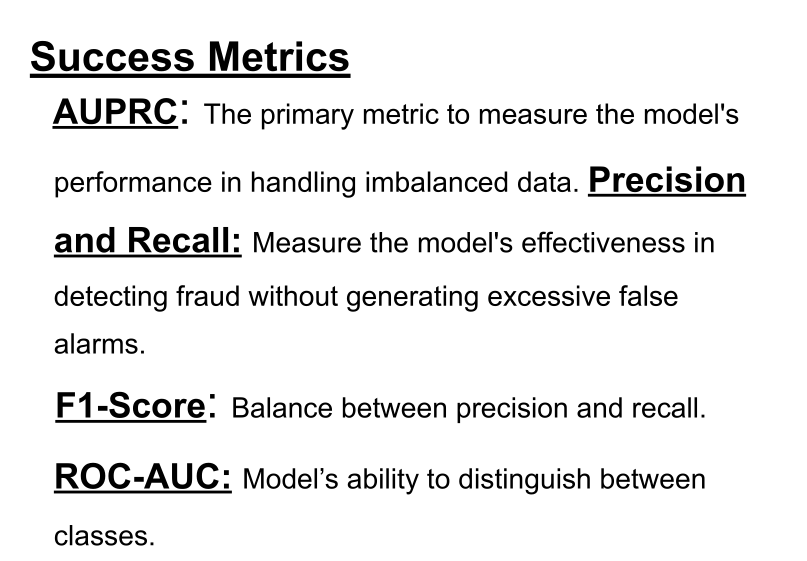

In [ ]:
# Note: as m